In [101]:
from numpy import array, linspace, sqrt, zeros, zeros_like, matrix, block, conjugate, argmax, pi, transpose
from numpy.linalg import eig, matrix_rank
from control import ss, ss2tf
from control.matlab import acker, lsim
import matplotlib.pyplot as plt

In [4]:
A = matrix([[0, 1], [0, -2]])
B = matrix([[0], [1]])
C = matrix([1, 0])
D = matrix([0])

G = ss(A, B, C, D)
G

<LinearIOSystem:sys[2]:['u[0]']->['y[0]']>

In [61]:
zeta = 0.6
wn = 4

s1 = -zeta*wn + 1j*wn*sqrt(1-zeta**2)
s2 = conjugate(s1)

wd = s1.imag
wa = 60*wd
T = 2*pi/wa
print(f'T = {T*1e3} ms')

T = 32.72492347489368 ms


In [102]:
Mc = block([B, A*B])

matrix([[ 0,  1],
        [ 1, -2]])

In [93]:
A_c = block([[A, zeros((2,1))], [-C, 0]])
B_c = block([[B], [0]])

K_c = acker(A_c, B_c, [s1, s2, -5*zeta*wn])
K_c
K = matrix([K_c[0, 0], K_c[0, 1]])
Ki = array(-K_c[0, 2])

print(f'K^ = {K_c}\nK = {K}\nKi = {Ki}')

K^ = [[  73.6   14.8 -192. ]]
K = [[73.6 14.8]]
Ki = 192.0


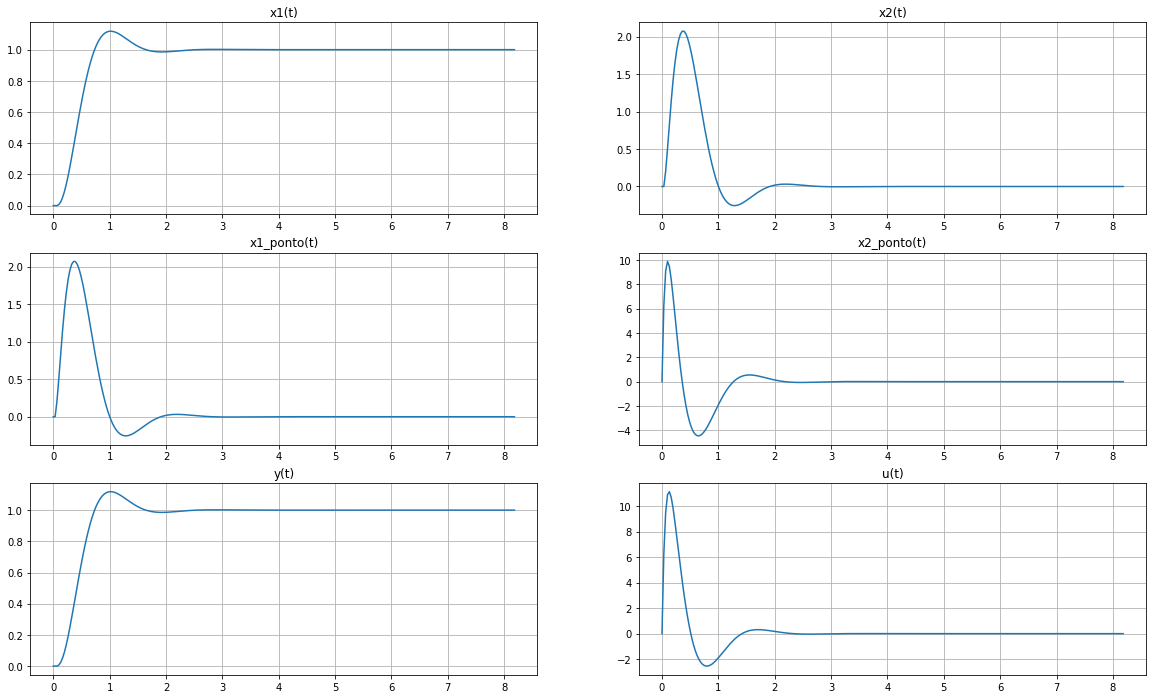

In [104]:
Kmax = 250
k = linspace(0, Kmax, Kmax+1)

ref = [1.0]*len(k)
x = matrix([zeros_like(k), zeros_like(k)])
x_p = zeros_like(x)

qsi = zeros_like(k)
qsi_p = zeros_like(k)
u = zeros_like(k)
y = zeros_like(k)

qsi_p[0] = ref[0] - y[0]

for i in range(1, len(k)):
    x[:, i] = T*x_p[:, i-1] + x[:, i-1]
    qsi[i] = T*qsi_p[i-1] + qsi[i-1]
    
    u[i] = qsi[i]*Ki - K*x[:, i]
    #print(f'{u[i]} = {qsi_p[i]}*{Ki} - {K}*{x[:, i]}')
    y[i] = C*x[:, i] + D*u[i]
    
    x_p[:, i] = A*x[:, i] + B*u[i]
    qsi_p[i] = ref[i] - y[i]
    
#print(qsi_p)

f, ([X1, X2], [X1_p, X2_p], [Y, U]) = plt.subplots(3, 2, figsize=[20, 12])

X1.plot(T*k, transpose(x[0,:]))
X1.set_title('x1(t)')
X1.grid()

X2.plot(T*k, transpose(x[1, :]))
X2.set_title('x2(t)')
X2.grid()

X1_p.plot(T*k, transpose(x_p[0,:]))
X1_p.set_title('x1_ponto(t)')
X1_p.grid()

X2_p.plot(T*k, transpose(x_p[1, :]))
X2_p.set_title('x2_ponto(t)')
X2_p.grid()

Y.plot(T*k, y)
Y.set_title('y(t)')
Y.grid()

U.plot(T*k, u)
U.set_title('u(t)')
U.grid()